In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()
image_name = list(uploaded.keys())[0]

Saving 35 Times Travelers Were So Stunned By The Place They Visited, They Just Had To Share Pics In This Group.jpg to 35 Times Travelers Were So Stunned By The Place They Visited, They Just Had To Share Pics In This Group (1).jpg


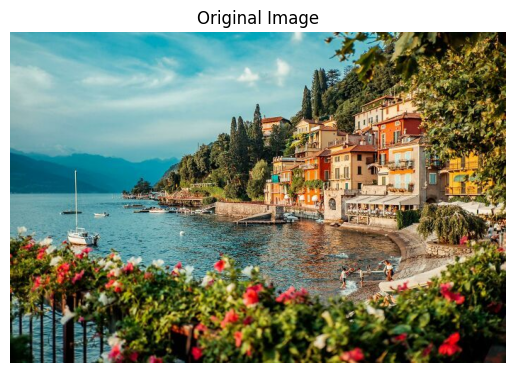

In [ ]:
img = cv2.imread(image_name)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

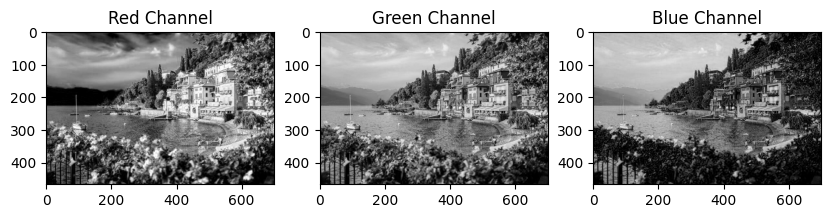

In [ ]:
r_channel, g_channel, b_channel = cv2.split(img_rgb)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(r_channel, cmap='gray')
plt.title("Red Channel")

plt.subplot(1,3,2)
plt.imshow(g_channel, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(b_channel, cmap='gray')
plt.title("Blue Channel")

plt.show()

In [ ]:
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
ycbcr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

print("Color space conversion successful ✅")

Color space conversion successful ✅


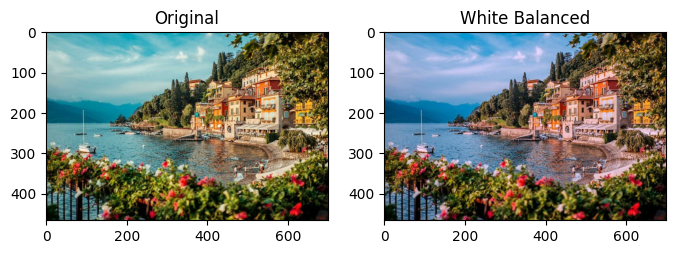

In [ ]:
def white_balance(img):
    img = img.astype(np.float32)
    avgR = np.mean(img[:,:,0])
    avgG = np.mean(img[:,:,1])
    avgB = np.mean(img[:,:,2])
    avgGray = (avgR + avgG + avgB) / 3

    img[:,:,0] *= avgGray / avgR
    img[:,:,1] *= avgGray / avgG
    img[:,:,2] *= avgGray / avgB

    return np.clip(img, 0, 255).astype(np.uint8)

wb_img = white_balance(img_rgb)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(wb_img)
plt.title("White Balanced")

plt.show()


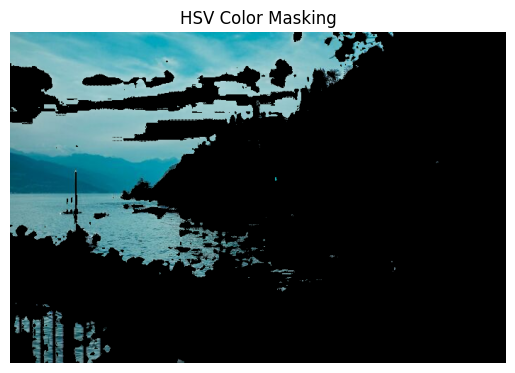

In [ ]:
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([140, 255, 255])

mask_hsv = cv2.inRange(hsv, lower_blue, upper_blue)
seg_hsv = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_hsv)

plt.imshow(seg_hsv)
plt.title("HSV Color Masking")
plt.axis("off")
plt.show()

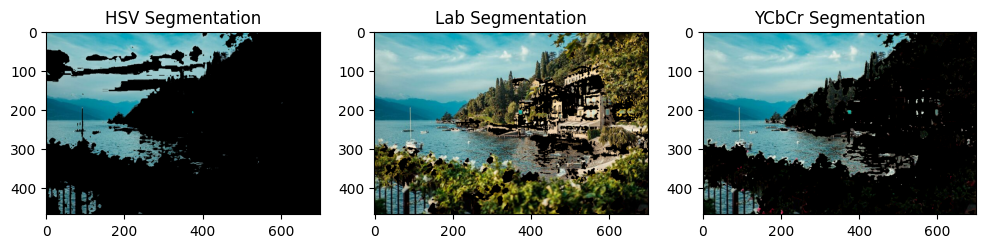

In [ ]:
L, A, B = cv2.split(lab)
_, lab_mask = cv2.threshold(A, 135, 255, cv2.THRESH_BINARY_INV)
seg_lab = cv2.bitwise_and(img_rgb, img_rgb, mask=lab_mask)
Y, Cr, Cb = cv2.split(ycbcr)
_, ycbcr_mask = cv2.threshold(Cb, 120, 255, cv2.THRESH_BINARY)
seg_ycbcr = cv2.bitwise_and(img_rgb, img_rgb, mask=ycbcr_mask)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(seg_hsv)
plt.title("HSV Segmentation")

plt.subplot(1,3,2)
plt.imshow(seg_lab)
plt.title("Lab Segmentation")

plt.subplot(1,3,3)
plt.imshow(seg_ycbcr)
plt.title("YCbCr Segmentation")

plt.show()